 An exploratory data analysis for an online store to understand its customers. 
 KPIs to explore are:
 1.monthly revenue
 2.monthly items sold
 3.Monthly active customers
 4.average revenue per month
 5.new vs existing customers

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("https://raw.githubusercontent.com/anilak1978/ecommerce/master/OnlineRetail.csv", encoding="ISO-8859-1",low_memory=False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.shape

(541909, 8)

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [70]:
# create the revenue variable
df['Revenue']=df['Quantity']* df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00


In [79]:
#update the invoice date
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth']=pd.DatetimeIndex(df['InvoiceDate']).month
df['InvoiceYear']=pd.DatetimeIndex(df['InvoiceDate']).year
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceYear,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12


In [81]:
#Get the years represented in the dataset.
df['InvoiceYear'].value_counts()

2011    499428
2010     42481
Name: InvoiceYear, dtype: int64

In [82]:
year_2010=df[df['InvoiceYear']==2010]
year_2010['InvoiceMonth'].unique()

array([12], dtype=int64)

In [46]:
year_2011=df[df['Invoiceyear']==2011]
year_2011['InvoiceMonth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [ ]:
#the data for 2010 has only one month available, while 2011 data has all the months, hence the discrepancy

In [102]:
#to get an overview of the revenue, i will group the revenue data by invoice month and invoice year
df_revenue=df.groupby(['InvoiceMonth', 'InvoiceYear'])['Revenue'].sum().reset_index()
df_revenue


,InvoiceMonth,InvoiceYear,Revenue
0,1,2011,560000.260
1,2,2011,498062.650
2,3,2011,683267.080
3,4,2011,493207.121
4,5,2011,723333.510
5,6,2011,691123.120
6,7,2011,681300.111
7,8,2011,682680.510
8,9,2011,1019687.622
9,10,2011,1070704.670


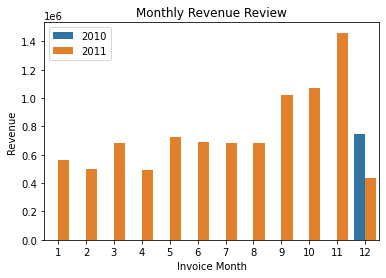

In [66]:
sns.barplot(x='InvoiceMonth', y='Revenue', hue='InvoiceYear', data=df_revenue)
plt.title('Monthly Revenue Review')
plt.xlabel('Invoice Month')
plt.ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

In [84]:
# december 2011 sales went to an all time low, why?
dec_2011=df[df['InvoiceYear']==2011]
dec_2011['InvoiceMonth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [85]:
dec_2010=df[df['InvoiceYear']==2010]
dec_2010['InvoiceMonth'].unique()

array([12], dtype=int64)

In [86]:
#monthly units sold overview

df_monthly_units=df.groupby(['InvoiceMonth', 'InvoiceYear'])['Quantity'].sum().reset_index()
df_monthly_units

,InvoiceMonth,InvoiceYear,Quantity
0,1,2011,308966
1,2,2011,277989
2,3,2011,351872
3,4,2011,289098
4,5,2011,380391
5,6,2011,341623
6,7,2011,391116
7,8,2011,406199
8,9,2011,549817
9,10,2011,570532


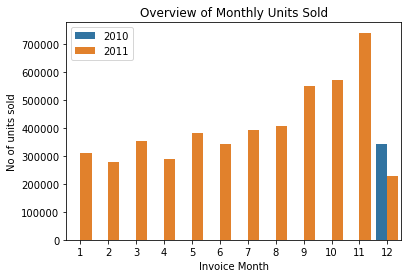

In [87]:
#visualizing the monthly units sold 
sns.barplot(x='InvoiceMonth', y='Quantity', data=df_monthly_units, hue='InvoiceYear')
plt.title('Overview of Monthly Units Sold')
plt.xlabel('Invoice Month')
plt.ylabel('No of units sold')
plt.legend(loc='upper left')
plt.show()

In [88]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceYear,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12


In [95]:
#Monthly Active customers
df_active_customers=df.groupby(['InvoiceYear', 'InvoiceMonth'])['CustomerID'].nunique().reset_index()
df_active_customers

,InvoiceYear,InvoiceMonth,CustomerID
0,2010,12,948
1,2011,1,783
2,2011,2,798
3,2011,3,1020
4,2011,4,899
5,2011,5,1079
6,2011,6,1051
7,2011,7,993
8,2011,8,980
9,2011,9,1302


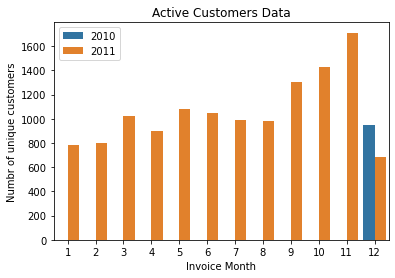

In [96]:
#visualizing the above
sns.barplot(x='InvoiceMonth', y='CustomerID', data=df_active_customers, hue='InvoiceYear')
plt.title('Active Customers Data')
plt.xlabel('Invoice Month')
plt.ylabel('Numbr of unique customers')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# from the bar plot, the number of unique customers increased sharply in november. This can be attributed to the upcoming festivities in the month of december
# however, the number of actuve customers have been increasing through out the year

In [109]:
# Average revenue per month

df_monthly_average=df.groupby(['InvoiceMonth', 'InvoiceYear'])['Revenue'].sum().reset_index().groupby('Revenue').mean().reset_index()
df_monthly_average                                                                                             

,Revenue,InvoiceMonth,InvoiceYear
0,433668.010,12,2011
1,493207.121,4,2011
2,498062.650,2,2011
3,560000.260,1,2011
4,681300.111,7,2011
5,682680.510,8,2011
6,683267.080,3,2011
7,691123.120,6,2011
8,723333.510,5,2011
9,748957.020,12,2010


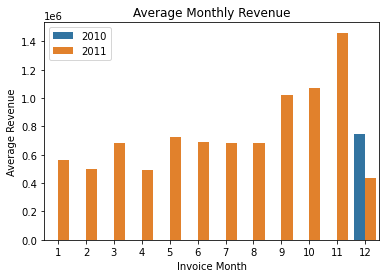

In [111]:
sns.barplot(x='InvoiceMonth', y='Revenue', data=df_monthly_average, hue='InvoiceYear')
plt.title('Average Monthly Revenue')
plt.xlabel('Invoice Month')
plt.ylabel('Average Revenue')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# New vs Existing users

In [121]:
df_first_purchase=df.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()
df_first_purchase.columns=['CustomerID', 'FirstPurchaseDate']
df1=pd.merge(df, df_first_purchase, on='CustomerID')
df1['UserType']='NewUser'
df1.loc[df1['InvoiceDate']>df1['FirstPurchaseDate'], 'UserType']='ExistingUser'
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceYear,InvoiceMonth,FirstPurchaseDate,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2010-12-01 08:26:00,NewUser
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12-01 08:26:00,NewUser
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2010-12-01 08:26:00,NewUser
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12-01 08:26:00,NewUser
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12-01 08:26:00,NewUser
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,15.00,2011,12,2011-12-09 12:16:00,NewUser
406825,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,2011,12,2011-12-09 12:16:00,NewUser
406826,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,2011,12,2011-12-09 12:16:00,NewUser
406827,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,24.96,2011,12,2011-12-09 12:16:00,NewUser


In [123]:
df1[df1['UserType']=='ExistingUser']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceYear,InvoiceMonth,FirstPurchaseDate,UserType
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,2010-12-01 08:26:00,ExistingUser
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,2010-12-01 08:26:00,ExistingUser
9,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,11.10,2010,12,2010-12-01 08:26:00,ExistingUser
10,536372,22633,HAND WARMER UNION JACK,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,11.10,2010,12,2010-12-01 08:26:00,ExistingUser
11,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30,2010,12,2010-12-01 08:26:00,ExistingUser
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406621,581125,21680,WOODLAND STICKERS,6,2011-12-07 12:41:00,0.85,14087.0,United Kingdom,5.10,2011,12,2011-12-07 12:28:00,ExistingUser
406622,581125,16216,LETTER SHAPE PENCIL SHARPENER,25,2011-12-07 12:41:00,0.06,14087.0,United Kingdom,1.50,2011,12,2011-12-07 12:28:00,ExistingUser
406623,581125,23191,BUNDLE OF 3 RETRO NOTE BOOKS,1,2011-12-07 12:41:00,1.65,14087.0,United Kingdom,1.65,2011,12,2011-12-07 12:28:00,ExistingUser
406624,581125,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,6,2011-12-07 12:41:00,1.65,14087.0,United Kingdom,9.90,2011,12,2011-12-07 12:28:00,ExistingUser


In [124]:
df_new_revenue=df1.groupby(['InvoiceMonth', 'InvoiceYear', 'UserType'])['Revenue'].sum().reset_index()
df_new_revenue.head(3)

,InvoiceMonth,InvoiceYear,UserType,Revenue
0,1,2011,ExistingUser,215147.02
1,1,2011,NewUser,259927.36
2,2,2011,ExistingUser,303359.43


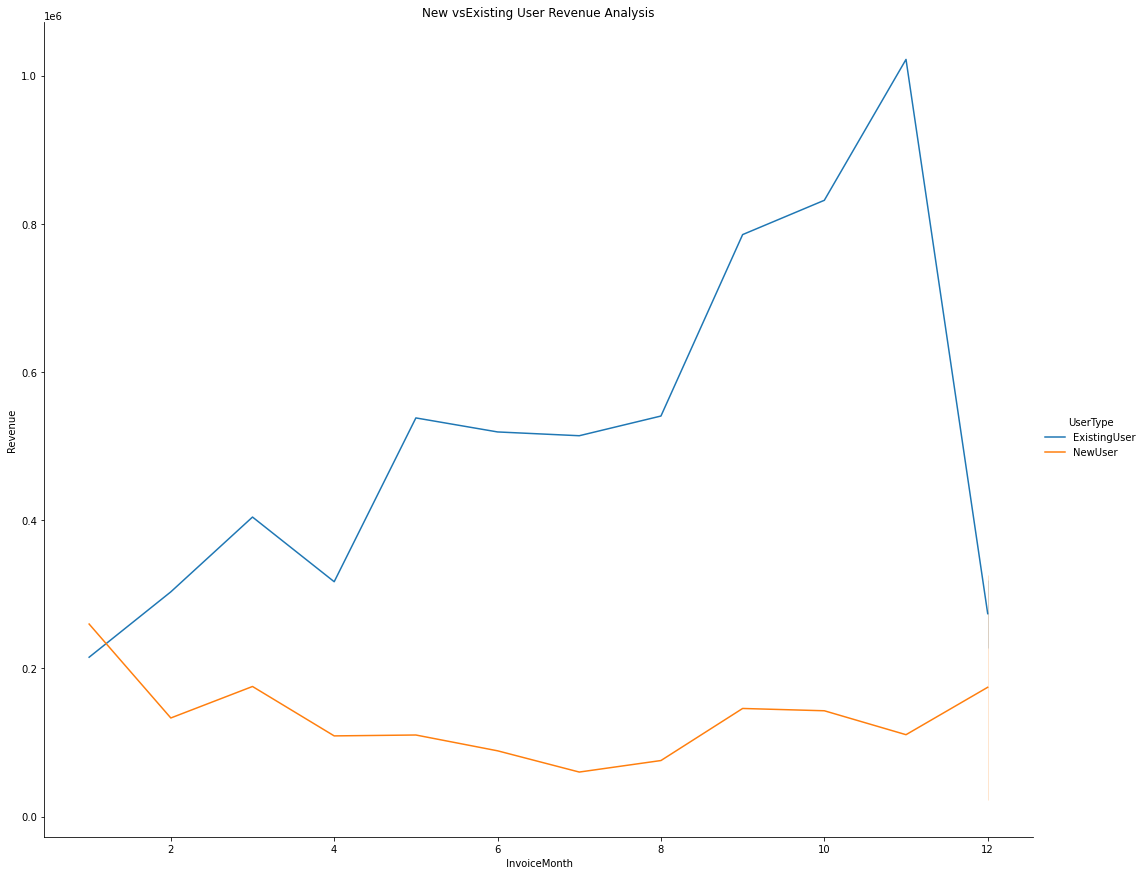

In [130]:
sns.relplot(x='InvoiceMonth',y='Revenue', data=df_new_revenue, hue='UserType', kind='line', height=12, aspect=12/10)
plt.title('New vsExisting User Revenue Analysis')
plt.xlabel(' InvoiceMonth')
plt.ylabel('Revenue')
plt.show()
